In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def P(t,Z):   #stolen from appendix of Schoenrich and Bergemann, 2014
    '''This function returns the combined 
    prior probability density of age and metallicity'''
    if t>14.0:
        return 0.0
    elif 11.0<=t<=14.0:
        return 1.0
    elif t<11.0:
        if Z<-0.9:
            return np.exp((t-11.0)/2.0)  #vary the slopes
        elif -0.9<=Z<=-0.5:
            return np.exp((t-11.0)/(1.5+9.0*(0.9+Z)/0.4))
        else:
            return np.exp((t-11.0)/12.0)

In [3]:
def P2(t,Z):   #stolen from appendix of Schoenrich and Bergemann, 2014
    '''This function returns the combined 
    prior probability density of age and metallicity'''
    if t>14.0:
        return 0.0
    elif 11.0<=t<=14.0:
        return 1.0
    elif t<11.0:
        if Z<-0.9:
            return np.exp((t-11.0)/2.0)+0.5*np.exp(-(t-2.5)**2.0/2*4.0**2)  #vary the slopes
        elif -0.9<=Z<=-0.5:
            return np.exp((t-11.0)/(1.5+9.0*(0.9+Z)/0.4))+0.5*np.exp(-(t-2.5)**2.0/2*4.0**2)
        else:
            return np.exp((t-11.0)/12.0)+0.5*np.exp(-(t-2.5)**2.0/2*4.0**2)

In [4]:
from scipy.integrate import quad
def integrand(Z, t):
    return np.exp((t-11.0)/(1.5+(9.0*(0.9+Z)/0.4)))

In [5]:
Z=np.linspace(-4.0,1.0,100)

In [6]:
age=np.linspace(0.0,14.0,100)

In [7]:
D=[]

for i in range(0,len(age)):
    if age[i]>14.0:
        D.append(0.0)
    if 11.0<=age[i]<=14.0:
        D.append(1.0)
    else:
        D.append(np.exp((age[i]-11.0)/1.5)+np.exp((age[i]-11.0)/9.0)+quad(integrand,-0.9,-0.5,args=(age[i]))[0])

In [8]:
D2=[]

for i in range(0,len(age)):
    if age[i]>14.0:
        D2.append(0.0)
    if 11.0<=age[i]<=14.0:
        D2.append(1.0)
    else:
        D2.append(np.exp((age[i]-11.0)/1.5)+0.5*np.exp(-(age[i]-2.5)**2.0/2*4.0**2)+np.exp((age[i]-11.0)/9.0)+quad(integrand,-0.9,-0.5,args=(age[i]))[0])

Text(0, 0.5, 'P')

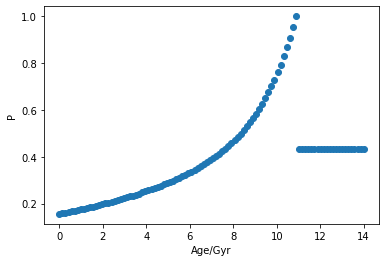

In [9]:
D=np.array(D,dtype=float)
plt.scatter(age,D/D.max())
plt.xlabel('Age/Gyr')
plt.ylabel('P')

Text(0, 0.5, 'P2')

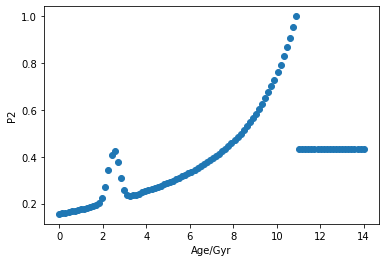

In [10]:
D2=np.array(D2,dtype=float)
plt.scatter(age,D2/D2.max())
plt.xlabel('Age/Gyr')
plt.ylabel('P2')